# Seattle Library Data: **Checkout Analysis**

**Aufgabe**: <br/>

*Seattle Library Datenanalyse: Die Library von Seattle veröffentlicht vorbildlich einige ihrer gesammelten Daten. Wir haben hier ein kleines Beispiel zusammengestellt, in dem Teile der Daten heruntergeladen werden, in einen Pandas-DataFrame geladen werden und dann analysiert werden. Darin könnt ihr noch ein paar weitere Funktionalitäten von pandas entdecken.*

*Erstellt ein neues Jupyter Notebook und überlegt euch für die Aufgabe drei Fragen, die ihr mittels einer Analyse mit Pandas auf die Daten anwenden könnt. Visualisiert eure Analysen durch tabellarische Form oder ein Histogramm.*

**Datasets**:

* [Checkouts by Title](https://dev.socrata.com/foundry/data.seattle.gov/tmmm-ytt6)
* [Library Collection Inventory](https://data.seattle.gov/Community/Library-Collection-Inventory/6vkj-f5xf)

**API-dokumenation**:
* Paging through Data https://dev.socrata.com/docs/queries/
* Queries using SODA https://dev.socrata.com/docs/paging.html

In [221]:
%matplotlib inline

import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline

from matplotlib.ticker import ScalarFormatter
from io import StringIO
from pathlib import Path

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Checkout Data Analysis 2011-2021

In [222]:
def load_data(start_year=2012, end_year=2013, start_month=2, end_month=4, limit=1000,
              filename='temp_data.csv'):
    """
    Helper function to download csv datasets for a range of years
    and months. By using the argument `limit` limit the count of 
    data entries per year.

    Parameters:

    - `start_year`: Set the start year (e.g. `2012`)
    - `end_year`: Set the end year (e.g. `2013`)
    - `start_month`: Set the starting month (e.g. `2` == February)
    - `end_month`: Set the ending month (e.g. `3` == March)
    - `limit`: Limits the amount of data entries retrieved for each month
    - `filename`: Set a filename for your csv

    Example:
    
    Get all checkout data for March and April between 2012 and 2021. Limit 
    the retrieved data for each month to 1000 and save the file as `checkouts.csv` 

    `load_data(start_year=2012, end_year=2021, start_month=3, end_month=4, limit=1000, filename='2012-21_seattlelib_checkouts.csv')`
    """
    # Create pd.DataFrame to store csv data
    df = pd.DataFrame()

    # Iterate over years and months and load csv data
    for year in range(start_year, (end_year + 1)):
        for month in range(start_month, (end_month + 1)):
            url = f"https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear={year}&checkoutmonth={month}&$limit={limit}"
            print(f'Loading csv data for {month}/{year} from: {url}')
            csv_content = urllib.request.urlopen(url).read().decode('utf-8')
            temp_df = pd.read_csv(StringIO(csv_content))
            df = pd.concat([df, temp_df], ignore_index=True)

    # Save DF to disk as csv
    print(f'Saving csv as {filename}')
    df.to_csv(filename, index=False)

### About the dataset
- Get library checkout data from the years **2011 to 2021**
- Limit data entries for each year to **20,000** and set the month to **March** to make each year comparable
- Concat each year to a `pd.DataFrame`
- Save the complete DataFrame as `csv`

In [225]:
# Define filename for csv database
csv_filename = '2011-21_seattlelib_checkouts.csv'

In [226]:
load_data(start_year=2011, end_year=2021, start_month=3, end_month=3, 
          limit=20000, filename=csv_filename)

Loading csv data for 3/2011 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2011&checkoutmonth=3&$limit=20000
Loading csv data for 3/2012 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2012&checkoutmonth=3&$limit=20000
Loading csv data for 3/2013 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2013&checkoutmonth=3&$limit=20000
Loading csv data for 3/2014 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2014&checkoutmonth=3&$limit=20000
Loading csv data for 3/2015 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2015&checkoutmonth=3&$limit=20000
Loading csv data for 3/2016 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2016&checkoutmonth=3&$limit=20000
Loading csv data for 3/2017 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2017&checkoutmonth=3&$limit=20000
Loading csv data for 3/2018 from: https://data.s

## **Data Cleaning**

In [227]:
# Read csv
checkout_df = pd.read_csv(Path(csv_filename))

In [229]:
checkout_df.head()

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,isbn,creator,subjects,publisher,publicationyear
0,Physical,Horizon,BOOK,2011,3,1,Expedition kayaking,NaN,NaN,Sea kayaking,NaN,NaN
1,Physical,Horizon,BOOK,2011,3,1,Shalako,NaN,NaN,Large type books,NaN,NaN
2,Physical,Horizon,BOOK,2011,3,1,Kukyongkkun,NaN,NaN,NaN,NaN,NaN
3,Physical,Horizon,BOOK,2011,3,11,On the hunt,NaN,NaN,"Love stories, Occult fiction",NaN,NaN
4,Digital,Freegal,SONG,2011,3,2,My Dear Mr. Gaye,NaN,Teena Marie,NaN,NaN,NaN


In [230]:
checkout_df.tail(3)

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,isbn,creator,subjects,publisher,publicationyear
219997,Physical,Horizon,BOOK,2021,3,4,Tua and the elephant / by R.P. Harris ; illust...,NaN,"Harris, R. P. (Randal Perry)","Asiatic elephant Juvenile fiction, Elephants J...","Chronicle Books,",2012.
219998,Digital,OverDrive,AUDIOBOOK,2021,3,2,"Traitor's Moon: Nightrunner Series, Book 3 (un...",NaN,Lynn Flewelling,"Fantasy, Fiction","Blackstone Audio, Inc.",2008
219999,Digital,OverDrive,EBOOK,2021,3,1,The Mark of the Golden Dragon: Being an Accoun...,NaN,L. A. Meyer,"Historical Fiction, Young Adult Fiction",Houghton Mifflin Harcourt Trade and Reference,2011


Check if monthly distribution of data entries is correct, i.e. **only** month of March is present

In [231]:
checkout_df['checkoutmonth'].value_counts() # *checkoutmonth* == 3 == March

checkoutmonth
3    220000
Name: count, dtype: int64

In [232]:
checkout_df.shape

(220000, 12)

In [233]:
checkout_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220000 entries, 0 to 219999
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   usageclass       220000 non-null  object 
 1   checkouttype     220000 non-null  object 
 2   materialtype     220000 non-null  object 
 3   checkoutyear     220000 non-null  int64  
 4   checkoutmonth    220000 non-null  int64  
 5   checkouts        220000 non-null  int64  
 6   title            220000 non-null  object 
 7   isbn             0 non-null       float64
 8   creator          176456 non-null  object 
 9   subjects         208920 non-null  object 
 10  publisher        193856 non-null  object 
 11  publicationyear  191224 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 20.1+ MB


### Improve memory usage

In [234]:
# Remove isbn column as it contains no values
print(checkout_df[checkout_df['isbn'].notna()])
del checkout_df['isbn']

Empty DataFrame
Columns: [usageclass, checkouttype, materialtype, checkoutyear, checkoutmonth, checkouts, title, isbn, creator, subjects, publisher, publicationyear]
Index: []


In [235]:
# Convert columns to appropriate dtypes
def improve_memory_usage(df):
    df['usageclass'] = df['usageclass'].astype('category')
    df['checkouttype'] = df['checkouttype'].astype('category')
    df['checkoutmonth'] = df['checkoutmonth'].astype('int8')
    df['checkouts'] = df['checkouts'].astype('int16')
    df['checkoutyear'] = df['checkoutyear'].astype('int16')
    return df

# Check for num of unique values
print(checkout_df['usageclass'].unique())
print(checkout_df['checkouttype'].unique())

checkout_df = improve_memory_usage(checkout_df)

['Physical' 'Digital']
['Horizon' 'Freegal' 'OverDrive' 'Hoopla' 'Zinio']


→ reduced `memory usage` by approx. 47 %

In [236]:
checkout_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220000 entries, 0 to 219999
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   usageclass       220000 non-null  category
 1   checkouttype     220000 non-null  category
 2   materialtype     220000 non-null  object  
 3   checkoutyear     220000 non-null  int16   
 4   checkoutmonth    220000 non-null  int8    
 5   checkouts        220000 non-null  int16   
 6   title            220000 non-null  object  
 7   creator          176456 non-null  object  
 8   subjects         208920 non-null  object  
 9   publisher        193856 non-null  object  
 10  publicationyear  191224 non-null  object  
dtypes: category(2), int16(2), int8(1), object(6)
memory usage: 11.5+ MB


## **Analysis**

#### Frequency distribution by `materialtype` (books, ebooks, audiobooks etc.)

In [237]:
# All available materialtypes in dataset
checkout_df['materialtype'].unique()

array(['BOOK', 'SONG', 'SOUNDDISC', 'VIDEODISC', 'EBOOK', 'AUDIOBOOK',
       'VISUAL', 'VIDEO', 'MUSIC', 'SOUNDDISC, VIDEODISC', 'VIDEOCASS',
       'MIXED', 'KIT', 'SOUNDREC', 'CR', 'SLIDE, VIDEOCASS', 'ER',
       'SOUNDCASS', 'ER, VIDEODISC', 'ER, SOUNDDISC',
       'FLASHCARD, SOUNDDISC',
       'SOUNDCASS, SOUNDDISC, VIDEOCASS, VIDEODISC', 'VIDEOCART',
       'SLIDE, SOUNDCASS, VIDEOCASS', 'MAP', 'MUSICSNDREC', 'ATLAS',
       'MOVIE', 'MAGAZINE', 'TELEVISION', 'REGPRINT', 'LARGEPRINT',
       'COMIC', 'VIDEOREC', 'SOUNDDISC, SOUNDREC', 'MICROFORM', 'GLOBE',
       'REGPRINT, SOUNDDISC', 'SOUNDDISC, VIDEOCASS', 'UNSPECIFIED'],
      dtype=object)

In [238]:
# Get top 10 materialtypes, but split concatenated values first (e.g. "ER, SOUNDDISC")
material_types = checkout_df['materialtype'].str.split(', ').explode().value_counts()[:10]
material_types

materialtype
BOOK          106570
EBOOK          42785
SOUNDDISC      20876
VIDEODISC      19583
AUDIOBOOK      17252
SONG            8654
MUSIC           1629
MOVIE            745
TELEVISION       515
VIDEO            314
Name: count, dtype: int64

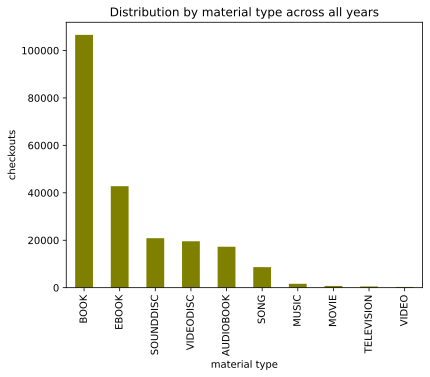

In [240]:
# Plot top 10 materialtypes
material_types.plot.bar(color='olive', 
                        xlabel='material type', 
                        ylabel='checkouts',
                        title='Distribution by material type across all years');

#### Amount of `checkouts` across all years

In [242]:
# Summed checkouts across all years
checkout_df['checkouts'].sum()

754891

In [243]:
# Sort DF by checkouts
checkout_df.sort_values(by='checkouts', ascending=False).head()

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
187332,Digital,OverDrive,EBOOK,2020,3,1270,There There: A Novel,Tommy Orange,"Fiction, Literature","Random House, Inc.",2018
156303,Physical,Horizon,MIXED,2018,3,1195,In Building Device Checkout,NaN,"Laptop computers, iPad Computer, Tablet computers","Lenovo,",[2013-].
167649,Physical,Horizon,BOOK,2019,3,509,Nine perfect strangers / Liane Moriarty.,"Moriarty, Liane","Novelists Fiction, Health resorts Fiction, Str...","Flatiron Books,",2018.
161859,Physical,Horizon,BOOK,2019,3,507,The library book / Susan Orlean.,"Orlean, Susan",Los Angeles Public Library Central Library Fir...,"Simon & Schuster,",2018.
132615,Digital,Zinio,MAGAZINE,2017,3,457,The Economist,NaN,NaN,NaN,NaN


#### Overall `checkout` distribution across all years

In [246]:
# Checkout stats for all unique titles (==count) in dataset
checkout_df.groupby('title')['checkouts'].sum().describe()

count    187369.000000
mean          4.028900
std          10.828354
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max        1270.000000
Name: checkouts, dtype: float64

Plot the distribution of summed checkouts for all unique titles, i.e. how many titles were checked out once vs. a hundred times across all years

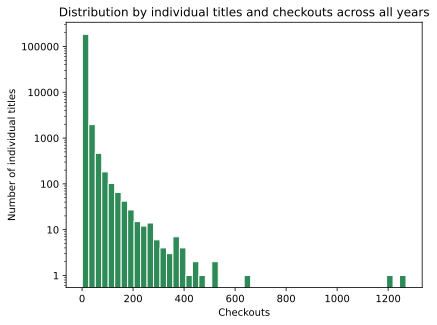

In [247]:
# Plot unique title distribution by summed checkouts across all years
checkout_data = checkout_df.groupby('title')['checkouts'].sum().sort_values(ascending=False)

plt.hist(checkout_data, bins=50, log=True, edgecolor='white', color='seagreen')
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.xlabel('Checkouts')
plt.ylabel('Number of individual titles')
plt.title('Distribution by individual titles and checkouts across all years')

plt.show()

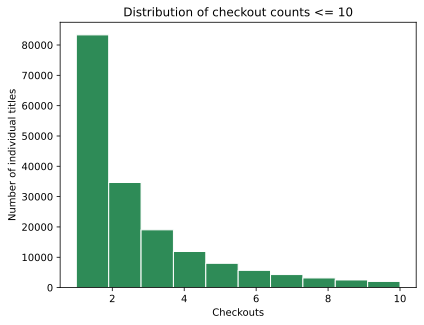

In [248]:
# Plot unique title distribution by summed checkouts across all years 
# for all unique titles that where checked out <= 10 times
checkouts_ser = checkout_df.groupby('title')['checkouts'].sum().sort_values(ascending=False)
checkout_bin10 = checkouts_ser[(checkouts_ser >= 1) & (checkouts_ser <= 10)]

plt.hist(checkout_bin10, bins=10, edgecolor='white', color='seagreen')
plt.xlabel('Checkouts')
plt.ylabel('Number of individual titles')
plt.title('Distribution of checkout counts <= 10')

plt.show()

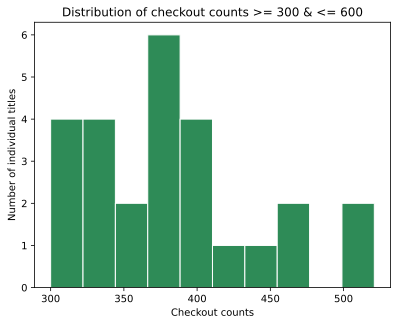

In [249]:
# Plot unique title distribution by summed checkouts across all years 
# for all unique titles that where checked out between 300 and 600 times
checkouts_ser = checkout_df.groupby('title')['checkouts'].sum().sort_values(ascending=False)
checkout_bin300 = checkouts_ser[(checkouts_ser >= 300) & (checkouts_ser <= 600)]

plt.hist(checkout_bin300, bins=10, edgecolor='white', color='seagreen')
plt.xlabel('Checkout counts')
plt.ylabel('Number of individual titles')
plt.title('Distribution of checkout counts >= 300 & <= 600')

plt.show()

In [251]:
# Print number of unique titles for different checkout groups
bins = checkout_df.groupby('title')['checkouts'].sum().sort_values(ascending=False)

bin5 = bins[(bins >= 1) & (bins <= 5)]
bin10 = bins[(bins >= 6) & (bins <= 10)]
bin25 = bins[(bins >= 11) & (bins <= 25)]
bin50 = bins[(bins >= 26) & (bins <= 50)]
bin100 = bins[(bins >= 51) & (bins <= 100)]
bin100plus = bins[(bins >= 101)]

print(f'Num of unique titles with checkouts between 1-5:    {len(bin5)} >> {(len(bin5)/len(bins)*100):.2f} % of all titles')
print(f'Num of unique titles with checkouts between 6-10:   {len(bin10)}  >> {(len(bin10)/len(bins)*100):.2f} % of all titles')
print(f'Num of unique titles with checkouts between 11-25:  {len(bin25)}   >> {(len(bin25)/len(bins)*100):.2f} % of all titles')
print(f'Num of unique titles with checkouts between 26-50:  {len(bin50)}   >> {(len(bin50)/len(bins)*100):.2f} % of all titles')
print(f'Num of unique titles with checkouts between 51-100: {len(bin100)}    >> {(len(bin100)/len(bins)*100):.2f} % of all titles')
print(f'Num of unique titles with checkouts above 100:      {len(bin100plus)}    >> {(len(bin100plus)/len(bins)*100):.2f} % of all titles')
print(f'Num of unique titles in dataset:                    {len(bins)}')


Num of unique titles with checkouts between 1-5:    156939 >> 83.76 % of all titles
Num of unique titles with checkouts between 6-10:   17643  >> 9.42 % of all titles
Num of unique titles with checkouts between 11-25:  9657   >> 5.15 % of all titles
Num of unique titles with checkouts between 26-50:  2145   >> 1.14 % of all titles
Num of unique titles with checkouts between 51-100: 662    >> 0.35 % of all titles
Num of unique titles with checkouts above 100:      323    >> 0.17 % of all titles
Num of unique titles in dataset:                    187369


#### Top 10 `titles` with most checkouts for all years

In [252]:
checkout_df.sort_values(by='checkouts', ascending=False)[['materialtype', 'checkoutyear', 'title', 'creator', 'checkouts']].head(10)

,materialtype,checkoutyear,title,creator,checkouts
187332,EBOOK,2020,There There: A Novel,Tommy Orange,1270
156303,MIXED,2018,In Building Device Checkout,NaN,1195
167649,BOOK,2019,Nine perfect strangers / Liane Moriarty.,"Moriarty, Liane",509
161859,BOOK,2019,The library book / Susan Orlean.,"Orlean, Susan",507
132615,MAGAZINE,2017,The Economist,NaN,457
88413,VIDEODISC,2015,Boyhood [videorecording] / IFC Films ; IFC Pro...,NaN,450
127708,MAGAZINE,2017,The New Yorker,NaN,399
122932,VIDEODISC,2017,Manchester by the Sea / Lionsgate ; Amazon Stu...,NaN,398
47119,VIDEODISC,2013,Moonrise kingdom [videorecording] / Focus Feat...,NaN,397
86272,VIDEODISC,2015,Guardians of the galaxy [videorecording] / Mar...,NaN,375


#### `Books` Top 10 with more than 100 checkouts across all years

In [253]:
# First 10 of subset
checkout_df.query('checkouts > 100 & materialtype == "BOOK"').sort_values(by='checkouts', ascending=False)[['materialtype', 'checkoutyear', 'title', 'creator', 'checkouts']].head(10)

,materialtype,checkoutyear,title,creator,checkouts
167649,BOOK,2019,Nine perfect strangers / Liane Moriarty.,"Moriarty, Liane",509
161859,BOOK,2019,The library book / Susan Orlean.,"Orlean, Susan",507
169499,BOOK,2019,An anonymous girl / Greer Hendricks and Sarah ...,"Hendricks, Greer",369
155044,BOOK,2018,Ready player one / Ernest Cline.,"Cline, Ernest",367
177586,BOOK,2019,The truths we hold : an American journey / Kam...,"Harris, Kamala D.",367
179237,BOOK,2019,Golden State / Ben H. Winters.,"Winters, Ben H.",333
206365,BOOK,2021,Keep sharp : build a better brain at any age /...,"Gupta, Sanjay, 1969-",326
211585,BOOK,2021,Modern comfort food : a Barefoot Contessa cook...,"Garten, Ina",280
178933,BOOK,2019,Heavy : an American memoir / Kiese Laymon.,"Laymon, Kiese",280
9605,BOOK,2011,The girl who kicked the hornet's nest / Stieg ...,"Larsson, Stieg, 1954-2004",230


#### `Ebooks` Top 10 with more than 100 checkouts across all years

In [254]:
# First 10 of subset
checkout_df.query('checkouts > 100 & materialtype == "EBOOK"').sort_values(by='checkouts', ascending=False)[['materialtype', 'checkoutyear', 'title', 'creator', 'checkouts']].head(10)

,materialtype,checkoutyear,title,creator,checkouts
187332,EBOOK,2020,There There: A Novel,Tommy Orange,1270
147781,EBOOK,2018,The Underground Railroad (Oprah's Book Club): ...,Colson Whitehead,263
106148,EBOOK,2016,All the Light We Cannot See: A Novel,Anthony Doerr,214
190686,EBOOK,2020,Such a Fun Age,Kiley Reid,202
214468,EBOOK,2021,Circe,Madeline Miller,182
161283,EBOOK,2019,The Witch Elm: A Novel,Tana French,180
213612,EBOOK,2021,Big Summer: A Novel,Jennifer Weiner,174
82587,EBOOK,2015,"The Cuckoo's Calling: Cormoran Strike Series, ...",Robert Galbraith,164
211843,EBOOK,2021,Leave the World Behind: A Novel,Rumaan Alam,159
213947,EBOOK,2021,"The Law of Innocence: Mickey Haller Series, Bo...",Michael Connelly,157


#### `Audiobooks` Top 10 with more than 100 checkouts across all years

In [255]:
# First 10 of subset
checkout_df.query('checkouts > 100 & materialtype == "AUDIOBOOK"').sort_values(by='checkouts', ascending=False)[['materialtype', 'checkoutyear', 'title', 'creator', 'checkouts']].head(10)

,materialtype,checkoutyear,title,creator,checkouts
211596,AUDIOBOOK,2021,The Vanishing Half: A Novel (unabridged) (Unab...,Brit Bennett,348
170965,AUDIOBOOK,2019,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,313
194576,AUDIOBOOK,2020,Where the Crawdads Sing (Unabridged),Delia Owens,256
198158,AUDIOBOOK,2020,Educated: A Memoir (unabridged) (Unabridged),Tara Westover,244
210214,AUDIOBOOK,2021,Harry Potter and the Chamber of Secrets: Harry...,J. K. Rowling,211
196444,AUDIOBOOK,2020,"Crazy Rich Asians: Crazy Rich Asians Series, B...",Kevin Kwan,203
202477,AUDIOBOOK,2021,The Queen's Gambit (Unabridged),Walter Tevis,168
201270,AUDIOBOOK,2021,"Dear Girls: Intimate Tales, Untold Secrets & A...",Ali Wong,151
181366,AUDIOBOOK,2020,"A Wrinkle In Time: Time Quartet, Book 1 (unabr...",Madeleine L'engle,149
148474,AUDIOBOOK,2018,Little Fires Everywhere (Unabridged),Celeste Ng,137


#### `Movies` Top 10 across all years

In [256]:
# First 10 of subset
checkout_df.query('materialtype == "MOVIE"').sort_values(by='checkouts', ascending=False)[['materialtype', 'checkoutyear', 'title', 'creator', 'checkouts']].head(10)

,materialtype,checkoutyear,title,creator,checkouts
144201,MOVIE,2018,Four Weddings And A Funeral,NaN,39
142747,MOVIE,2018,My Friend Dahmer,NaN,34
111717,MOVIE,2016,August: Osage County,NaN,33
95858,MOVIE,2015,Six Degrees Of Separation,NaN,26
128628,MOVIE,2017,Sunshine Cleaning,NaN,20
139908,MOVIE,2017,Fishing Naked,NaN,18
43444,MOVIE,2013,Bernie,NaN,18
126286,MOVIE,2017,A Fish Called Wanda,NaN,17
143726,MOVIE,2018,Discreet,NaN,16
133631,MOVIE,2017,Just Friends,NaN,15


#### `Sounddisc` Top 10 across all years

In [257]:
# First 10 of subset
checkout_df.query('materialtype == "SOUNDDISC"').sort_values(by='checkouts', ascending=False)[['materialtype', 'checkoutyear', 'title', 'creator', 'checkouts']].head(10)

,materialtype,checkoutyear,title,creator,checkouts
44412,SOUNDDISC,2013,The heist [sound recording] / Macklemore & Rya...,"Macklemore, 1983-",154
34511,SOUNDDISC,2012,Ceremonials [sound recording] / Florence + the...,Florence + the Machine,153
66770,SOUNDDISC,2014,Reflektor [sound recording] / Arcade Fire.,Arcade Fire (Musical group),145
74425,SOUNDDISC,2014,Vs. (redux) [sound recording] / Macklemore ; R...,"Macklemore, 1983-",122
10611,SOUNDDISC,2011,The fame monster [sound recording] / Lady Gaga.,Lady Gaga,105
73853,SOUNDDISC,2014,Prism [sound recording] / Katy Perry.,"Perry, Katy",98
25469,SOUNDDISC,2012,The Head and the Heart [sound recording].,Head and the Heart (Musical group),86
79142,SOUNDDISC,2014,2014 Grammy nominees [sound recording].,NaN,72
100596,SOUNDDISC,2016,To pimp a butterfly [sound recording] / Kendri...,"Lamar, Kendrick, 1987-",71
43254,SOUNDDISC,2013,Love this giant [sound recording] / David Byrn...,"Byrne, David, 1952-",70


#### `Magazines` Top 10 across all years

In [258]:
# First 10 of subset
checkout_df.query('materialtype == "MAGAZINE"').sort_values(by='checkouts', ascending=False)[['materialtype', 'checkoutyear', 'title', 'creator', 'checkouts']].head(10)

,materialtype,checkoutyear,title,creator,checkouts
132615,MAGAZINE,2017,The Economist,NaN,457
127708,MAGAZINE,2017,The New Yorker,NaN,399
73889,MAGAZINE,2014,Star Magazine,NaN,172
116971,MAGAZINE,2016,Star Magazine,NaN,154
114186,MAGAZINE,2016,Cook's Illustrated,NaN,139
103364,MAGAZINE,2016,National Geographic Interactive,NaN,109
60334,MAGAZINE,2014,"O, The Oprah Magazine",NaN,98
82160,MAGAZINE,2015,AppleMagazine,NaN,85
72613,MAGAZINE,2014,Rolling Stone,NaN,84
149292,MAGAZINE,2018,Astronomy,NaN,79


#### Overall top 10 most checked out `creators` across all years and mediatypes

In [259]:
checkout_df.groupby('creator')['checkouts'].sum().sort_values(ascending=False)[:10]

creator
Seuss, Dr.                   1934
Willems, Mo                  1598
Osborne, Mary Pope           1540
Meadows, Daisy               1529
Davis, Jim, 1945 July 28-    1426
Stilton, Geronimo            1279
Tommy Orange                 1270
Michael Connelly             1075
James Patterson              1065
Rylant, Cynthia              1005
Name: checkouts, dtype: int16

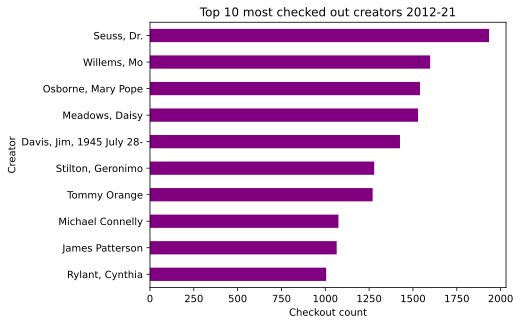

In [260]:
# Plot top 10 most checked out creators
top10creators = checkout_df.groupby('creator')['checkouts'].sum().sort_values(ascending=False)[:10].sort_values()

ax = top10creators.plot(kind='barh', color='purple')
plt.xlabel('Checkout count')
plt.ylabel('Creator')
plt.title('Top 10 most checked out creators 2012-21')

plt.show()

#### Yearly checkouts for overall top 5 `creators`

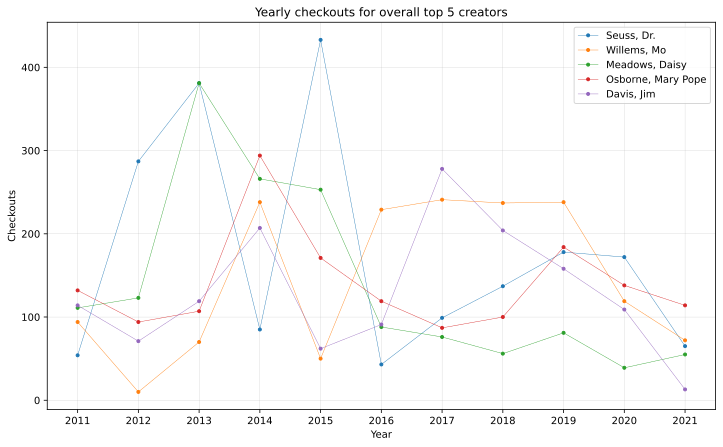

In [261]:
seuss_data = checkout_df[checkout_df['creator'] == 'Seuss, Dr.'].groupby('checkoutyear')['checkouts'].sum()
willems_data = checkout_df[checkout_df['creator'] == 'Willems, Mo'].groupby('checkoutyear')['checkouts'].sum()
meadows_data = checkout_df[checkout_df['creator'] == 'Meadows, Daisy'].groupby('checkoutyear')['checkouts'].sum()
osborne_data = checkout_df[checkout_df['creator'] == 'Osborne, Mary Pope'].groupby('checkoutyear')['checkouts'].sum()
davis_data = checkout_df[checkout_df['creator'] == 'Davis, Jim, 1945 July 28-'].groupby('checkoutyear')['checkouts'].sum()

# Increase plot size for better display
plt.figure(figsize=(12, 7))
plt.grid(True, which='both', linestyle='-', linewidth=0.2)

# Plot data
plt.plot(seuss_data, label='Seuss, Dr.', marker='.', linewidth='0.4')
plt.plot(willems_data, label='Willems, Mo', marker='.', linewidth='0.4')
plt.plot(meadows_data, label='Meadows, Daisy', marker='.', linewidth='0.4')
plt.plot(osborne_data, label='Osborne, Mary Pope', marker='.', linewidth='0.4')
plt.plot(davis_data, label='Davis, Jim', marker='.', linewidth='0.4')

# Plot labels, legend, title
plt.xlabel('Year')
plt.ylabel('Checkouts')
plt.title('Yearly checkouts for overall top 5 creators')
plt.xticks(seuss_data.index)
plt.legend()

plt.show()

We know the checkout distribution for the overall top 5 creators. But how many **unqiue** `titles` are available for checkout for each of these creators?

In [262]:
top5_creators = list(checkout_df.groupby('creator')['checkouts'].sum().sort_values(ascending=False)[:5].index)

for creator in top5_creators:
    print(f"Unique Titles for {creator}: {len(checkout_df[checkout_df['creator'] == creator].groupby('title'))}")

Unique Titles for Seuss, Dr.: 68
Unique Titles for Willems, Mo: 33
Unique Titles for Osborne, Mary Pope: 87
Unique Titles for Meadows, Daisy: 90
Unique Titles for Davis, Jim, 1945 July 28-: 49


And what `materialtypes` are available for those titles?

In [263]:
for creator in top5_creators:
    temp_df = pd.DataFrame(checkout_df[checkout_df['creator'] == creator].groupby('title')['materialtype'].value_counts()).reset_index()
    print(f"Available materialtypes for {creator}:")
    print(temp_df['materialtype'].value_counts()) 
    print()

Available materialtypes for Seuss, Dr.:
materialtype
BOOK         61
SOUNDDISC     8
Name: count, dtype: int64

Available materialtypes for Willems, Mo:
materialtype
BOOK    33
Name: count, dtype: int64

Available materialtypes for Osborne, Mary Pope:
materialtype
BOOK         74
SOUNDDISC    13
Name: count, dtype: int64

Available materialtypes for Meadows, Daisy:
materialtype
BOOK        89
REGPRINT     1
Name: count, dtype: int64

Available materialtypes for Davis, Jim, 1945 July 28-:
materialtype
BOOK        48
REGPRINT     1
Name: count, dtype: int64



#### Yearly checkouts per `usageclass` type

In [264]:
checkout_df.groupby('checkoutyear')['usageclass'].value_counts()

checkoutyear  usageclass
2011          Physical      17371
              Digital        2629
2012          Physical      16278
              Digital        3722
2013          Physical      15796
              Digital        4204
2014          Physical      14696
              Digital        5304
2015          Physical      13284
              Digital        6716
2016          Physical      12846
              Digital        7154
2017          Physical      12634
              Digital        7366
2018          Physical      12004
              Digital        7996
2019          Physical      12824
              Digital        7176
2020          Physical      11205
              Digital        8795
2021          Digital       10544
              Physical       9456
Name: count, dtype: int64

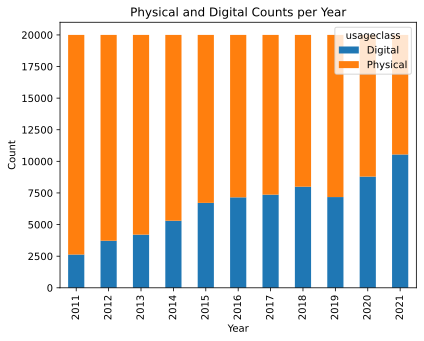

In [265]:
plot_data = checkout_df.groupby('checkoutyear')['usageclass'].value_counts().unstack()

ax = plot_data.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Physical and Digital Counts per Year')

plt.show()

#### Comparison between yearly checkouts of `usageclass` type in 2011 and 2021

In [503]:
len(checkout_df[checkout_df['checkoutyear'] == checkout_df['checkoutyear'].unique()[0]])

20000

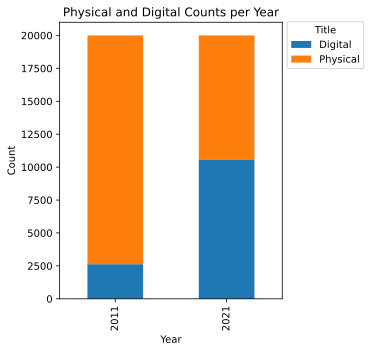

In [509]:
# Plotting comparison between 2011 / 2021
plot_data = checkout_df.query('checkoutyear.isin([2011, 2021])').groupby('checkoutyear')['usageclass'].value_counts().unstack()

ax = plot_data.plot(kind='bar', stacked=True, figsize=(4, 5))

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Physical and Digital Counts per Year')
plt.legend(title='Title', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

#### Trend for top 5 `materialtype`

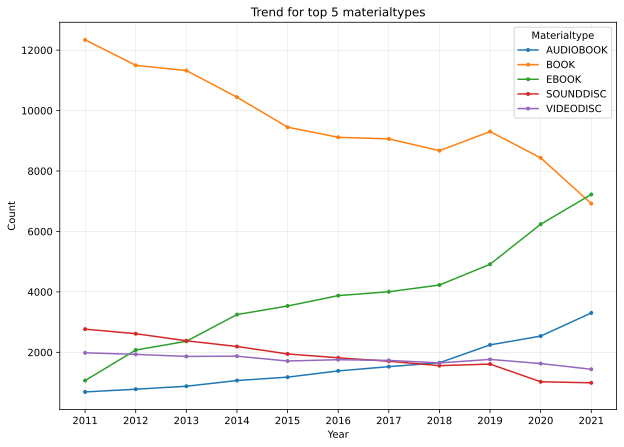

In [471]:
# Get labels of top 5 materialtypes
top5_mtypes = list(checkout_df['materialtype'].value_counts().index[:5])

# Group data
mtypes_df = checkout_df[checkout_df['materialtype'].isin(top5_mtypes)]
mtypes_plot_data = mtypes_df.groupby('checkoutyear')['materialtype'].value_counts().unstack()

# Increase plot size for better display
plt.figure(figsize=(10, 7))
plt.grid(True, which='both', linestyle='-', linewidth=0.2)

# Plot data
plt.plot(mtypes_plot_data, marker='.', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Trend for top 5 materialtypes')
plt.xticks(mtypes_plot_data.index)
plt.legend(title='Materialtype', labels=mtypes_plot_data.columns)

plt.show()

# **Checkout Data Analysis 2021**

## About the dataset

- Get library checkout data for the **whole year of 2021**
- Limit data entries per month to **50,000**
- Concat each year to a `pd.DataFrame`
- Save the complete DataFrame as `csv`

In [272]:
csv_filename = '2021_seattle_lib_checkouts.csv'

In [273]:
load_data(start_year=2021, end_year=2021, start_month=1, end_month=12,
          limit=50000, filename=csv_filename)

Loading csv data for 1/2021 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2021&checkoutmonth=1&$limit=50000
Loading csv data for 2/2021 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2021&checkoutmonth=2&$limit=50000
Loading csv data for 3/2021 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2021&checkoutmonth=3&$limit=50000
Loading csv data for 4/2021 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2021&checkoutmonth=4&$limit=50000
Loading csv data for 5/2021 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2021&checkoutmonth=5&$limit=50000
Loading csv data for 6/2021 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2021&checkoutmonth=6&$limit=50000
Loading csv data for 7/2021 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2021&checkoutmonth=7&$limit=50000
Loading csv data for 8/2021 from: https://data.s

## Data Cleaning

In [274]:
# Read csv
checkouts2021_df = pd.read_csv(Path(csv_filename))

In [275]:
checkouts2021_df.head()

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,isbn,creator,subjects,publisher,publicationyear
0,Digital,OverDrive,EBOOK,2021,1,1,California: A History,NaN,Kevin Starr,"History, Nonfiction, Reference","Random House, Inc.",2010
1,Digital,OverDrive,EBOOK,2021,1,2,Agnes Grey,NaN,Anne Brontë,"Classic Literature, Fiction",Duke Classics,2020
2,Digital,OverDrive,EBOOK,2021,1,12,Tailspin,NaN,Sandra Brown,"Fiction, Romance, Suspense, Thriller","Hachette Digital, Inc.",2018
3,Digital,OverDrive,EBOOK,2021,1,1,Unleashed,NaN,Laurien Berenson,"Fiction, Mystery",Lightning Source Inc,2016
4,Physical,Horizon,BOOK,2021,1,1,The stoic / Theodore Dreiser.,NaN,"Dreiser, Theodore, 1871-1945",NaN,"World Pub. Co.,",[1947]


In [276]:
# Check if every month is present and evenly distributed
checkouts2021_df['checkoutmonth'].value_counts()

checkoutmonth
1     50000
2     50000
3     50000
4     50000
5     50000
6     50000
7     50000
8     50000
9     50000
10    50000
11    50000
12    50000
Name: count, dtype: int64

In [277]:
checkouts2021_df.shape

(600000, 12)

### Improve memory usage

In [278]:
checkouts2021_df = improve_memory_usage(checkouts2021_df)
del checkouts2021_df['isbn']

In [279]:
checkouts2021_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   usageclass       600000 non-null  category
 1   checkouttype     600000 non-null  category
 2   materialtype     600000 non-null  object  
 3   checkoutyear     600000 non-null  int16   
 4   checkoutmonth    600000 non-null  int8    
 5   checkouts        600000 non-null  int16   
 6   title            600000 non-null  object  
 7   creator          546040 non-null  object  
 8   subjects         597013 non-null  object  
 9   publisher        598948 non-null  object  
 10  publicationyear  598805 non-null  object  
dtypes: category(2), int16(2), int8(1), object(6)
memory usage: 31.5+ MB


## **Analysis**

#### Frequency distribution by `materialtype` (books, ebooks, audiobooks etc.)

In [281]:
material_types_2021 = checkouts2021_df['materialtype'].str.split(', ').explode().value_counts()[:10]
material_types_2021

materialtype
BOOK          224332
EBOOK         205127
AUDIOBOOK      96747
VIDEODISC      40811
SOUNDDISC      30054
REGPRINT        1379
MUSIC            772
VIDEO            297
LARGEPRINT       245
ER               235
Name: count, dtype: int64

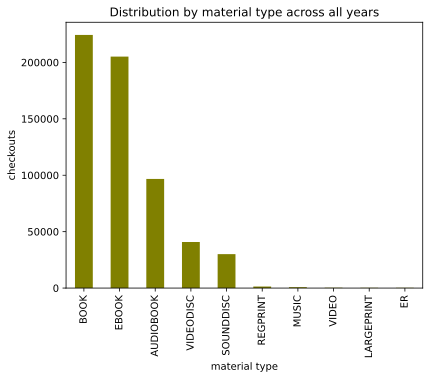

In [282]:
# Plot top 10 materialtypes
material_types_2021.plot.bar(color='olive', 
                            xlabel='material type', 
                            ylabel='checkouts',
                            title='Distribution by material type across all years');

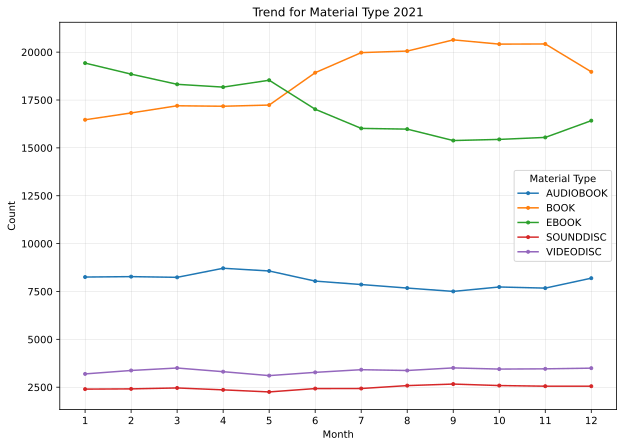

In [284]:
search_mtypes = ['BOOK',
                'SOUNDDISC',
                'EBOOK',
                'AUDIOBOOK',
                'VIDEODISC']

mtypes_df = checkouts2021_df[checkouts2021_df['materialtype'].isin(search_mtypes)]
mtypes_plot_data = mtypes_df.groupby('checkoutmonth')['materialtype'].value_counts().unstack()

# Increase plot size for better display
plt.figure(figsize=(10, 7))
plt.grid(True, which='both', linestyle='-', linewidth=0.2)

plt.plot(mtypes_plot_data, marker='.', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(mtypes_plot_data.index)
plt.title('Trend for Material Type 2021')
plt.legend(title='Material Type', labels=mtypes_plot_data.columns)

plt.show()

#### Top 10 `titles` with most checkouts in 2021

In [285]:
checkouts2021_df.groupby(['materialtype', 'creator', 'title'])['checkouts'].sum().sort_values(ascending=False)[:10]

materialtype  creator               title                                                                                
EBOOK         Barack Obama          A Promised Land                                                                          2422
AUDIOBOOK     Brit Bennett          The Vanishing Half: A Novel (unabridged)                                                 1629
EBOOK         Kristin Hannah        The Four Winds: A Novel                                                                  1548
              Matt Haig             The Midnight Library: A Novel                                                            1505
              Jessica Bruder        Nomadland: Surviving America in the Twenty-First Century                                 1459
AUDIOBOOK     Malcolm Gladwell      Talking to Strangers: What We Should Know about the People We Don't Know (unabridged)    1435
EBOOK         Brit Bennett          The Vanishing Half: A Novel                                   

#### Top 10 `Books` in 2021

In [286]:
checkouts2021_df.query('materialtype == "BOOK"').groupby(['materialtype', 'creator', 'title'])['checkouts'].sum().sort_values(ascending=False)[:10]

materialtype  creator                        title                                                                                                                                 
BOOK          Gupta, Sanjay, 1969-           Keep sharp : build a better brain at any age / Sanjay Gupta with Kristin Loberg.                                                          1318
              McLain, Paula                  When the stars go dark : a novel / Paula McLain.                                                                                          1136
              Gates, Bill, 1955-             How to avoid a climate disaster : the solutions we have and the breakthroughs we need / Bill Gates.                                       1044
              Wilkerson, Isabel              Caste : the origins of our discontents / Isabel Wilkerson.                                                                                 914
              Harper, Jane (Jane Elizabeth)  The survivors / Jane Ha

In [435]:
def plot_top_checkouts_per_month(df, material_type='BOOK', top_n=5, plot_line=False):
    """
    Creates a scatter plot for checkouts per month for a chosen `material_type` 
    of the provided DataFrame `df`. The parameter `top_n` defines the number of 
    top materialtypes that will be plotted, e.g. `top_n=5` plots the 5 most common
    `material_types` of the DataFrame `df`.

    Parameters:

    - `df`: DataFrame
    - `material_type`: Entry in `materialtype` column of DataFrame `df`
    - `top_n`: Integer for top n most common `materialtypes` that should be plotted
    - `plot_line`: Connect scatter dots with a line (`True` or `False`)
    """    
    top5_data = list(df[df['materialtype'] == material_type].groupby('title')['checkouts'].sum().sort_values(ascending=False)[:top_n].index)
    top5_plot_data = df[df['title'].isin(top5_data)][['title', 'checkoutmonth', 'checkouts']]

    # Increase plot size for better display
    plt.figure(figsize=(8, 5))
    plt.grid(True, which='both', linestyle='-', linewidth=0.2)

    # Plot data
    for title, group in top5_plot_data.groupby('title'):
        plt.scatter(group['checkoutmonth'], group['checkouts'], label=title, alpha=0.7, s=60)
        if plot_line == True:
            plt.plot(group['checkoutmonth'], group['checkouts'], alpha=0.1)

    # Add labels, title and xticks.
    plt.xlabel('Month')
    plt.ylabel('Checkouts')
    plt.title(f'Checkouts per month for top {top_n} {material_type} titles')
    plt.xticks([i for i in range(1, 13)])
    plt.legend(title='Title', bbox_to_anchor=(1, 1.02), loc='upper left')

    plt.show()

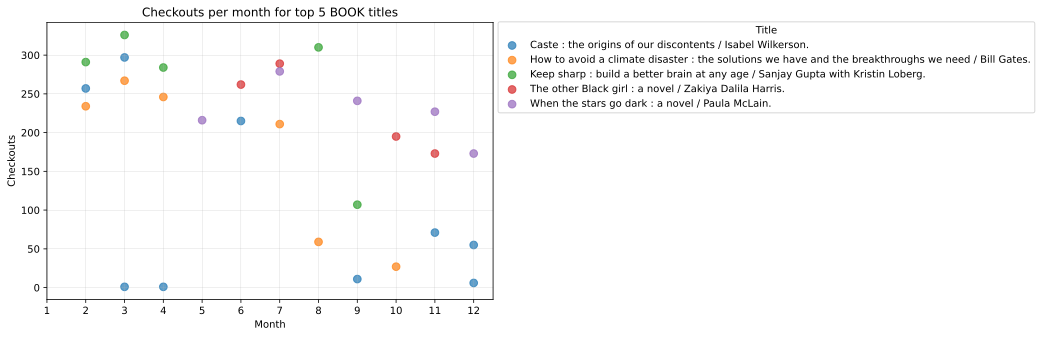

In [433]:
# Plot checkouts per month for top 5 BOOK titles in 2021
plot_top_checkouts_per_month(checkouts2021_df, material_type='BOOK', top_n=5)

#### Top 10 `Ebooks` in 2021

In [288]:
checkouts2021_df.query('materialtype == "EBOOK"').groupby(['materialtype', 'creator', 'title'])['checkouts'].sum().sort_values(ascending=False)[:10]

materialtype  creator          title                                                   
EBOOK         Barack Obama     A Promised Land                                             2422
              Kristin Hannah   The Four Winds: A Novel                                     1548
              Matt Haig        The Midnight Library: A Novel                               1505
              Jessica Bruder   Nomadland: Surviving America in the Twenty-First Century    1459
              Brit Bennett     The Vanishing Half: A Novel                                 1384
              Madeline Miller  Circe                                                       1328
              Jojo Moyes       The Giver of Stars: A Novel                                 1101
              Celeste Ng       Little Fires Everywhere: A Novel                            1059
              Lucy Foley       The Guest List: A Novel                                      992
              Jeanine Cummins  American Dirt: A 

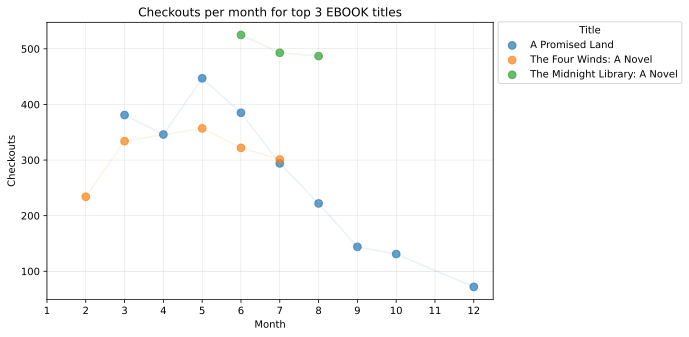

In [436]:
# Plot checkouts per month for top 3 EBOOK titles in 2021
plot_top_checkouts_per_month(checkouts2021_df, material_type='EBOOK', top_n=3, plot_line=True)

#### Top 10 `Audiobooks` in 2021

In [437]:
checkouts2021_df.query('materialtype == "AUDIOBOOK"').groupby(['materialtype', 'creator', 'title'])['checkouts'].sum().sort_values(ascending=False)[:10]

materialtype  creator              title                                                                                                             
AUDIOBOOK     Brit Bennett         The Vanishing Half: A Novel (unabridged)                                                                              1629
              Malcolm Gladwell     Talking to Strangers: What We Should Know about the People We Don't Know (unabridged)                                 1435
              Lucy Foley           The Guest List: A Novel (unabridged)                                                                                  1162
              Robin Wall Kimmerer  Braiding Sweetgrass: Indigenous Wisdom, Scientific Knowledge and the Teachings of Plants (unabridged) (Unabridged)    1036
              Barack Obama         A Promised Land (Unabridged)                                                                                           820
              Mark Manson          The Subtle Art of Not Giv

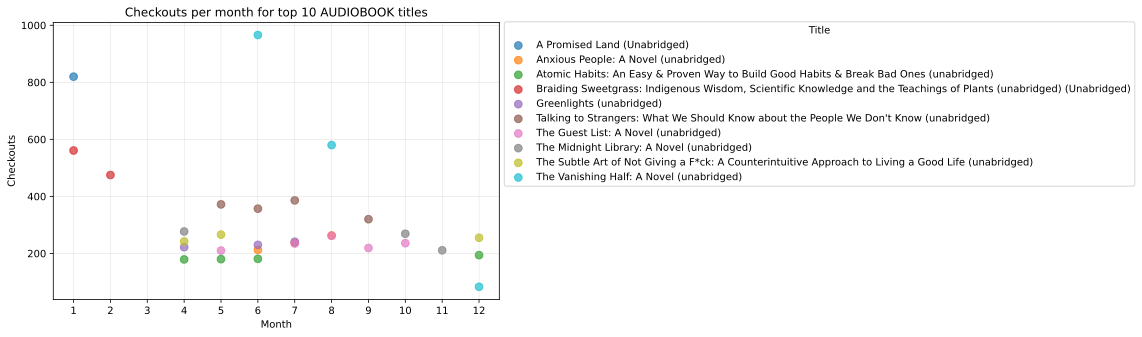

In [441]:
# Plot checkouts per month for top 10 AUDIOBOOK titles in 2021
plot_top_checkouts_per_month(checkouts2021_df, material_type='AUDIOBOOK', top_n=10)

#### Overall top 10 most checked out `creators` in 2021

In [442]:
checkouts2021_df.groupby('creator')['checkouts'].sum().sort_values(ascending=False)[:10]

creator
Willems, Mo         6242
Julia Quinn         5490
James Patterson     4948
Agatha Christie     4679
Stephen King        4368
Jeff Kinney         4013
Barack Obama        3975
Brit Bennett        3843
Louise Penny        3834
Michael Connelly    3779
Name: checkouts, dtype: int16

#### Checkout trend for Top 5 `creators` in 2021

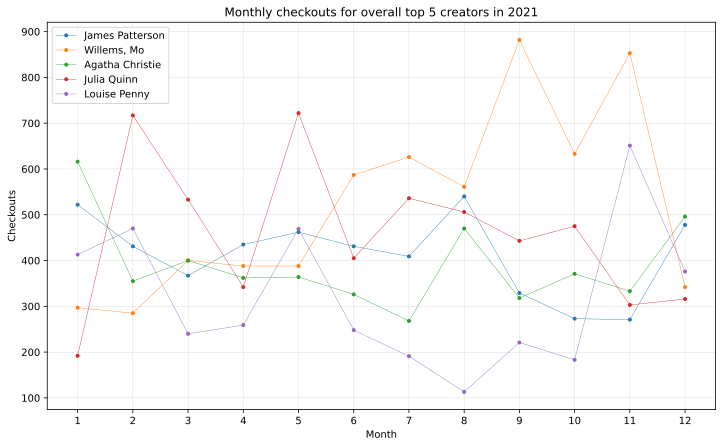

In [443]:
patterson_data = checkouts2021_df[checkouts2021_df['creator'] == 'James Patterson'].groupby('checkoutmonth')['checkouts'].sum()
willems_data = checkouts2021_df[checkouts2021_df['creator'] == 'Willems, Mo'].groupby('checkoutmonth')['checkouts'].sum()
christie_data = checkouts2021_df[checkouts2021_df['creator'] == 'Agatha Christie'].groupby('checkoutmonth')['checkouts'].sum()
quinn_data = checkouts2021_df[checkouts2021_df['creator'] == 'Julia Quinn'].groupby('checkoutmonth')['checkouts'].sum()
penny_data = checkouts2021_df[checkouts2021_df['creator'] == 'Louise Penny'].groupby('checkoutmonth')['checkouts'].sum()

# Increase plot size for better display
plt.figure(figsize=(12, 7))
plt.grid(True, which='both', linestyle='-', linewidth=0.2)

# Plot data
plt.plot(patterson_data, label='James Patterson', marker='.', linewidth='0.4')
plt.plot(willems_data, label='Willems, Mo', marker='.', linewidth='0.4')
plt.plot(christie_data, label='Agatha Christie', marker='.', linewidth='0.4')
plt.plot(quinn_data, label='Julia Quinn', marker='.', linewidth='0.4')
plt.plot(penny_data, label='Louise Penny', marker='.', linewidth='0.4')

# Plot labels, legend, title
plt.xlabel('Month')
plt.ylabel('Checkouts')
plt.xticks(christie_data.index)
plt.title('Monthly checkouts for overall top 5 creators in 2021')
plt.legend()

plt.show()

#### Monthly checkouts per `usageclass` type

In [444]:
checkouts2021_df.groupby('checkoutmonth')['usageclass'].value_counts()

checkoutmonth  usageclass
1              Digital       27720
               Physical      22280
2              Digital       27152
               Physical      22848
3              Digital       26594
               Physical      23406
4              Digital       26909
               Physical      23091
5              Digital       27130
               Physical      22870
6              Digital       25089
               Physical      24911
7              Physical      26094
               Digital       23906
8              Physical      26318
               Digital       23682
9              Physical      27092
               Digital       22908
10             Physical      26805
               Digital       23195
11             Physical      26749
               Digital       23251
12             Physical      25365
               Digital       24635
Name: count, dtype: int64

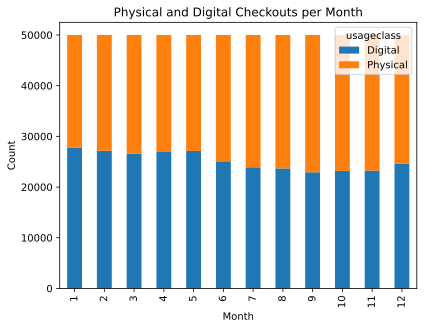

In [445]:
plot_data = checkouts2021_df.groupby('checkoutmonth')['usageclass'].value_counts().unstack()

ax = plot_data.plot(kind='bar', stacked=True)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Physical and Digital Checkouts per Month')

plt.show()

# **<span style="color:brown">Wikidata Entity Linking**</span> and **Graph Construction**

In [446]:
import requests
import re

### Check Top 10 Creator DataFrame

In [447]:
top10_df = checkouts2021_df.groupby(['materialtype', 'creator', 'title'])['checkouts'].sum().sort_values(ascending=False)[:10]
top10_df = pd.DataFrame(top10_df).reset_index()
top10_df

,materialtype,creator,title,checkouts
0,EBOOK,Barack Obama,A Promised Land,2422
1,AUDIOBOOK,Brit Bennett,The Vanishing Half: A Novel (unabridged),1629
2,EBOOK,Kristin Hannah,The Four Winds: A Novel,1548
3,EBOOK,Matt Haig,The Midnight Library: A Novel,1505
4,EBOOK,Jessica Bruder,Nomadland: Surviving America in the Twenty-Fir...,1459
5,AUDIOBOOK,Malcolm Gladwell,Talking to Strangers: What We Should Know abou...,1435
6,EBOOK,Brit Bennett,The Vanishing Half: A Novel,1384
7,EBOOK,Madeline Miller,Circe,1328
8,BOOK,"Gupta, Sanjay, 1969-",Keep sharp : build a better brain at any age /...,1318
9,AUDIOBOOK,Lucy Foley,The Guest List: A Novel (unabridged),1162


### Clean Name Data

Clean the names from column `creator` so that they are easily searchable in wikidata

In [448]:
def reverse_name(name):
    name_parts = name.split(', ')
    name_parts.reverse()
    return ' '.join(name_parts)

# If creator column contains only birth date
top10_df['creator'] = top10_df['creator'].str.replace(r',\s*\d{4}-', '', regex=True)

# If creator column contains birth date AND death date
top10_df['creator'] = top10_df['creator'].str.replace(r',\s*\d{4}-\d{4}', '', regex=True)

# If creator column contains name in wrong order (last_name, first_name)
top10_df['creator'] = top10_df['creator'].apply(reverse_name)

# Check cleaned DataFrame
top10_df

,materialtype,creator,title,checkouts
0,EBOOK,Barack Obama,A Promised Land,2422
1,AUDIOBOOK,Brit Bennett,The Vanishing Half: A Novel (unabridged),1629
2,EBOOK,Kristin Hannah,The Four Winds: A Novel,1548
3,EBOOK,Matt Haig,The Midnight Library: A Novel,1505
4,EBOOK,Jessica Bruder,Nomadland: Surviving America in the Twenty-Fir...,1459
5,AUDIOBOOK,Malcolm Gladwell,Talking to Strangers: What We Should Know abou...,1435
6,EBOOK,Brit Bennett,The Vanishing Half: A Novel,1384
7,EBOOK,Madeline Miller,Circe,1328
8,BOOK,Sanjay Gupta,Keep sharp : build a better brain at any age /...,1318
9,AUDIOBOOK,Lucy Foley,The Guest List: A Novel (unabridged),1162


In [449]:
# Clean title column
def clean_title(title):
    pattern = re.compile(r':.*')
    clean_title = re.sub(pattern, '', title)
    return clean_title.strip()

top10_df['clean_title'] = top10_df['title'].apply(clean_title)
top10_df

,materialtype,creator,title,checkouts,clean_title
0,EBOOK,Barack Obama,A Promised Land,2422,A Promised Land
1,AUDIOBOOK,Brit Bennett,The Vanishing Half: A Novel (unabridged),1629,The Vanishing Half
2,EBOOK,Kristin Hannah,The Four Winds: A Novel,1548,The Four Winds
3,EBOOK,Matt Haig,The Midnight Library: A Novel,1505,The Midnight Library
4,EBOOK,Jessica Bruder,Nomadland: Surviving America in the Twenty-Fir...,1459,Nomadland
5,AUDIOBOOK,Malcolm Gladwell,Talking to Strangers: What We Should Know abou...,1435,Talking to Strangers
6,EBOOK,Brit Bennett,The Vanishing Half: A Novel,1384,The Vanishing Half
7,EBOOK,Madeline Miller,Circe,1328,Circe
8,BOOK,Sanjay Gupta,Keep sharp : build a better brain at any age /...,1318,Keep sharp
9,AUDIOBOOK,Lucy Foley,The Guest List: A Novel (unabridged),1162,The Guest List


### **Rough** Wikidata Entity Linking for column `creator`

(*Rough*) First entity of resulting list will be mapped to creator, i.e. mismaps are possible

In [450]:
def get_wikidata_entity(name):
        url = "http://www.wikidata.org/w/api.php"
        params = {
            "search": name,
            "action": "wbsearchentities",
            "format": "json",
            "language": "en",
            "type": "item",
            "continue": "0",
            "limit": "10"
        }
        json_data = requests.get(url, params=params).json()
        if len(json_data['search']) > 0:
            return json_data['search'][0]['id'] # Returns Wikidata ID
        else:
            return None
        
def construct_wikidata_links(wd_id):
     if wd_id != None:
        url_base = 'https://www.wikidata.org/wiki/'
        return url_base + wd_id
     
def print_wikidata_urls(dataframe):
     for i in range(0, len(dataframe)):
        print(f"{dataframe['creator'][i]}: {construct_wikidata_links(dataframe['c_wd'][i])}")
        print(f"{dataframe['clean_title'][i]}: {construct_wikidata_links(dataframe['t_wd'][i])}")
        print(f"{dataframe['materialtype'][i]}: {construct_wikidata_links(dataframe['m_wd'][i])}")
        print()

In [451]:
# Get Wikidata IDs for column creator
top10_df['c_wd'] = top10_df['creator'].apply(get_wikidata_entity)

In [452]:
# Get Wikidata IDs for column materialtype
top10_df['m_wd'] = top10_df['materialtype'].apply(get_wikidata_entity)

In [453]:
# Get Wikidata IDs for column materialtype
top10_df['t_wd'] = top10_df['clean_title'].apply(get_wikidata_entity)

In [454]:
top10_df = top10_df.filter(['creator',
                            'c_wd',
                            'title',
                            'clean_title',
                            't_wd',
                            'materialtype',
                            'm_wd',
                            'checkouts'])
top10_df

,creator,c_wd,title,clean_title,t_wd,materialtype,m_wd,checkouts
0,Barack Obama,Q76,A Promised Land,A Promised Land,Q101438737,EBOOK,Q128093,2422
1,Brit Bennett,Q27449519,The Vanishing Half: A Novel (unabridged),The Vanishing Half,Q98476957,AUDIOBOOK,Q106833,1629
2,Kristin Hannah,Q533400,The Four Winds: A Novel,The Four Winds,Q112119139,EBOOK,Q128093,1548
3,Matt Haig,Q926682,The Midnight Library: A Novel,The Midnight Library,Q106814534,EBOOK,Q128093,1505
4,Jessica Bruder,Q63098703,Nomadland: Surviving America in the Twenty-Fir...,Nomadland,Q61740820,EBOOK,Q128093,1459
5,Malcolm Gladwell,Q318429,Talking to Strangers: What We Should Know abou...,Talking to Strangers,Q69523853,AUDIOBOOK,Q106833,1435
6,Brit Bennett,Q27449519,The Vanishing Half: A Novel,The Vanishing Half,Q98476957,EBOOK,Q128093,1384
7,Madeline Miller,Q469349,Circe,Circe,Q187602,EBOOK,Q128093,1328
8,Sanjay Gupta,Q510034,Keep sharp : build a better brain at any age /...,Keep sharp,Q115164824,BOOK,Q571,1318
9,Lucy Foley,Q19325957,The Guest List: A Novel (unabridged),The Guest List,Q122363681,AUDIOBOOK,Q106833,1162


In [455]:
print_wikidata_urls(top10_df)

Barack Obama: https://www.wikidata.org/wiki/Q76
A Promised Land: https://www.wikidata.org/wiki/Q101438737
EBOOK: https://www.wikidata.org/wiki/Q128093

Brit Bennett: https://www.wikidata.org/wiki/Q27449519
The Vanishing Half: https://www.wikidata.org/wiki/Q98476957
AUDIOBOOK: https://www.wikidata.org/wiki/Q106833

Kristin Hannah: https://www.wikidata.org/wiki/Q533400
The Four Winds: https://www.wikidata.org/wiki/Q112119139
EBOOK: https://www.wikidata.org/wiki/Q128093

Matt Haig: https://www.wikidata.org/wiki/Q926682
The Midnight Library: https://www.wikidata.org/wiki/Q106814534
EBOOK: https://www.wikidata.org/wiki/Q128093

Jessica Bruder: https://www.wikidata.org/wiki/Q63098703
Nomadland: https://www.wikidata.org/wiki/Q61740820
EBOOK: https://www.wikidata.org/wiki/Q128093

Malcolm Gladwell: https://www.wikidata.org/wiki/Q318429
Talking to Strangers: https://www.wikidata.org/wiki/Q69523853
AUDIOBOOK: https://www.wikidata.org/wiki/Q106833

Brit Bennett: https://www.wikidata.org/wiki/Q274